# Introduction


Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.float_format = "{:.3f}".format
#plt.rcParams["figure.figsize"] = (12,7)



# Ingest the data to notebook

In [2]:
df  = pd.read_csv("heart.csv")
df.head()
# cp(göğüs agrısı tipi) ,restecg(dinlenme kardiografi sonuçları) ,slope(maxium egzersizde ST segmentinin eğilimi) , thal

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0    2.300      0   
1   37    1   2       130   250    0        1      187      0    3.500      0   
2   41    0   1       130   204    0        0      172      0    1.400      2   
3   56    1   1       120   236    0        1      178      0    0.800      2   
4   57    0   0       120   354    0        1      163      1    0.600      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Hastaların kalp hastalığı olup olmadığı içindeki özelliklere göre sınıflandırılan bir verimiz var. Bu verileri, bir hastanın bu hastalığa sahip olup olmadığını tahmin etmeye çalışan bir model oluşturmak için kullanmaya çalışacağız. 


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [8]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [9]:
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})

In [10]:
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})

In [11]:
df.head()

age  sex                cp  trestbps  chol  fbs  \
0   63    1      asymptomatic       145   233    1   
1   37    1  non-anginal pain       130   250    0   
2   41    0   atypical angina       130   204    0   
3   56    1   atypical angina       120   236    0   
4   57    0    typical angina       120   354    0   

                        restecg  thalach  exang  oldpeak slope  ca thal  \
0                        normal      150      0    2.300     0   0    1   
1  having ST-T wave abnormality      187      0    3.500     0   0    2   
2                        normal      172      0    1.400  flat   0    2   
3  having ST-T wave abnormality      178      0    0.800  flat   0    2   
4  having ST-T wave abnormality      163      1    0.600  flat   0    2   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [12]:
df.describe().T

count    mean    std     min     25%     50%     75%     max
age      303.000  54.366  9.082  29.000  47.500  55.000  61.000  77.000
sex      303.000   0.683  0.466   0.000   0.000   1.000   1.000   1.000
trestbps 303.000 131.624 17.538  94.000 120.000 130.000 140.000 200.000
chol     303.000 246.264 51.831 126.000 211.000 240.000 274.500 564.000
fbs      303.000   0.149  0.356   0.000   0.000   0.000   0.000   1.000
thalach  303.000 149.647 22.905  71.000 133.500 153.000 166.000 202.000
exang    303.000   0.327  0.470   0.000   0.000   0.000   1.000   1.000
oldpeak  303.000   1.040  1.161   0.000   0.000   0.800   1.600   6.200
ca       303.000   0.729  1.023   0.000   0.000   0.000   1.000   4.000
target   303.000   0.545  0.499   0.000   0.000   1.000   1.000   1.000

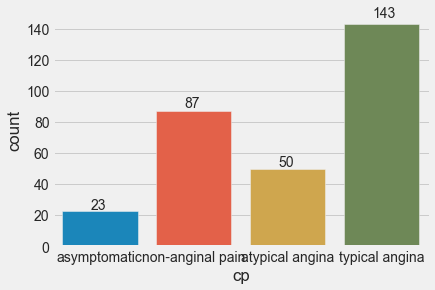

In [13]:
ax = sns.countplot(df.cp)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [14]:
df.target.value_counts(normalize=True)

1   0.545
0   0.455
Name: target, dtype: float64

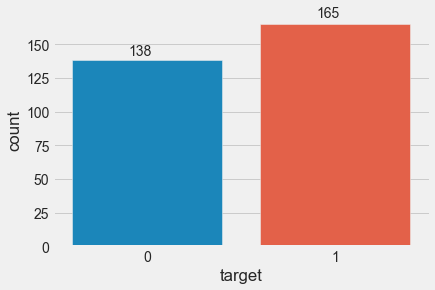

In [15]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

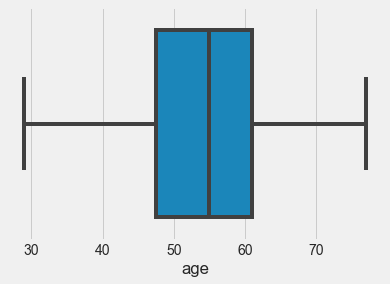

In [16]:
sns.boxplot(df.age);

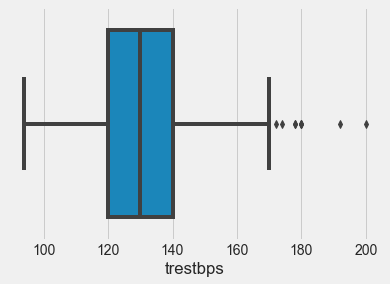

In [17]:
sns.boxplot(df.trestbps); # dinlenme kan basıncı

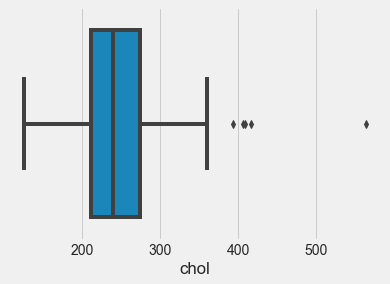

In [18]:
sns.boxplot(df.chol);

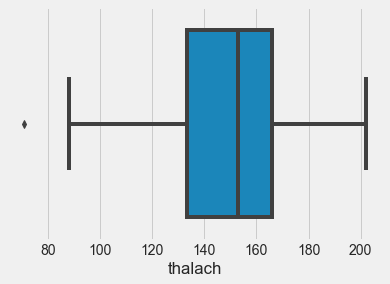

In [19]:
sns.boxplot(df.thalach);  # max kalp atışı

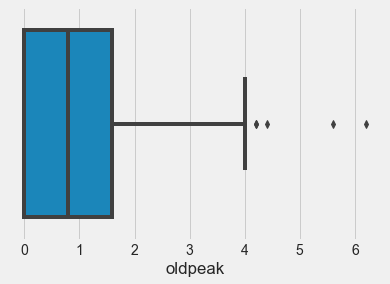

In [20]:
sns.boxplot(df.oldpeak);  # egzersize bağlı st depresyonu

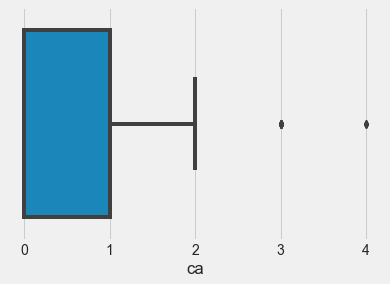

In [21]:
sns.boxplot(df.ca);  # büyük kan damar sayısı

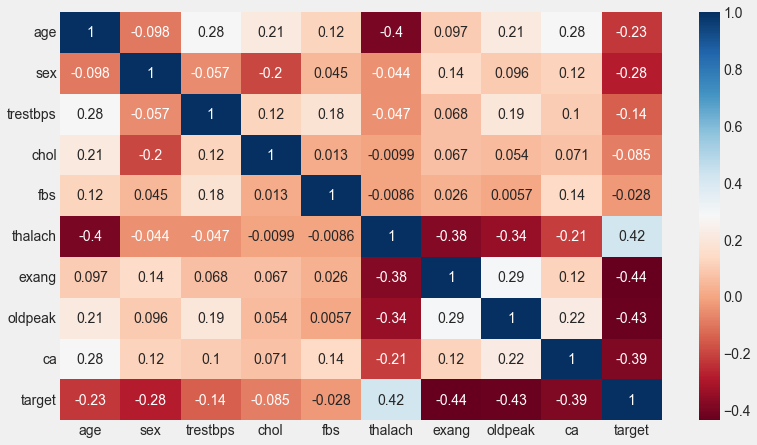

In [22]:
plt.rcParams["figure.figsize"] = (12,7)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='RdBu');

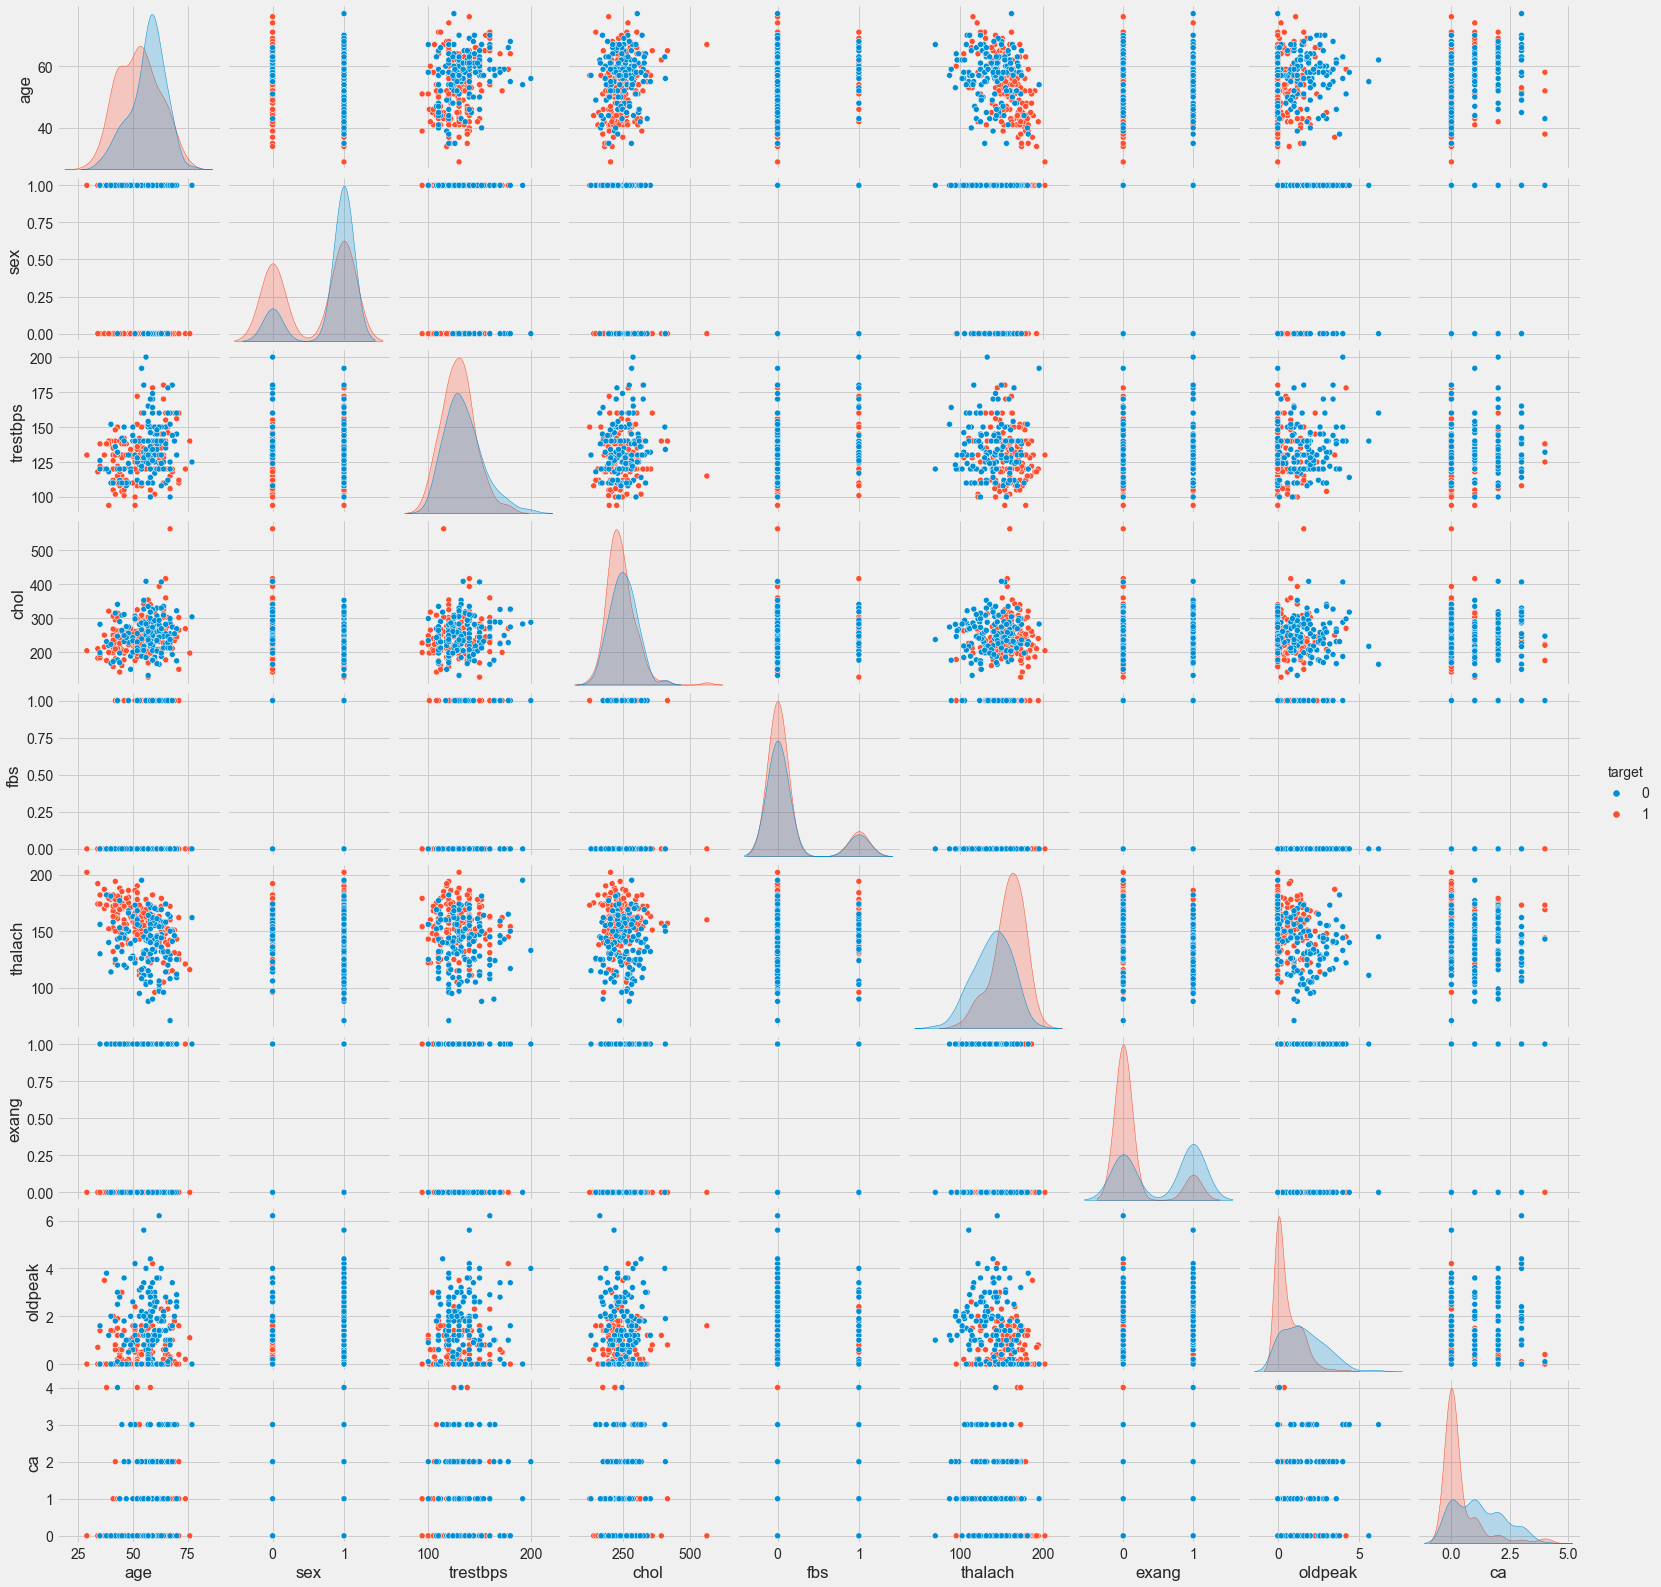

In [23]:
sns.pairplot(df.select_dtypes(include='number'),hue='target'); 

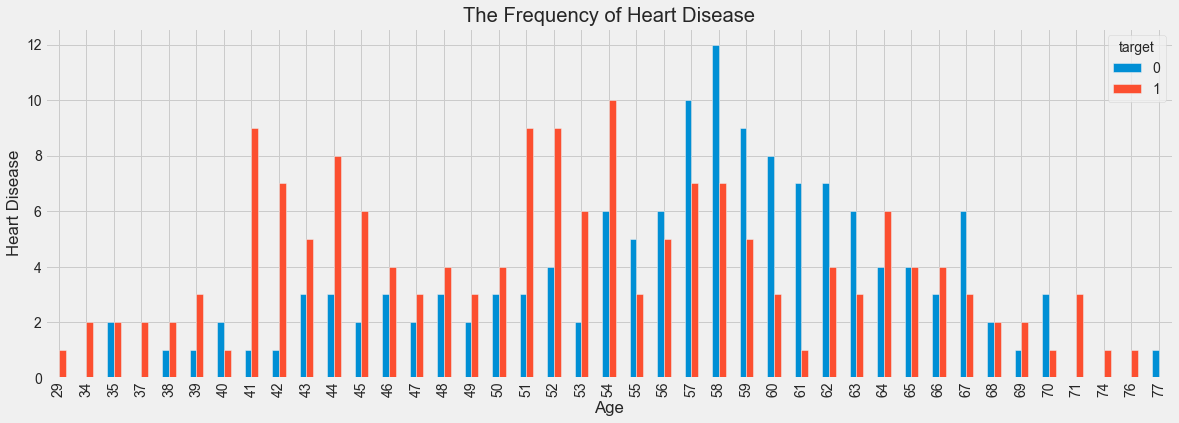

In [24]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(18,6))
plt.title('The Frequency of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

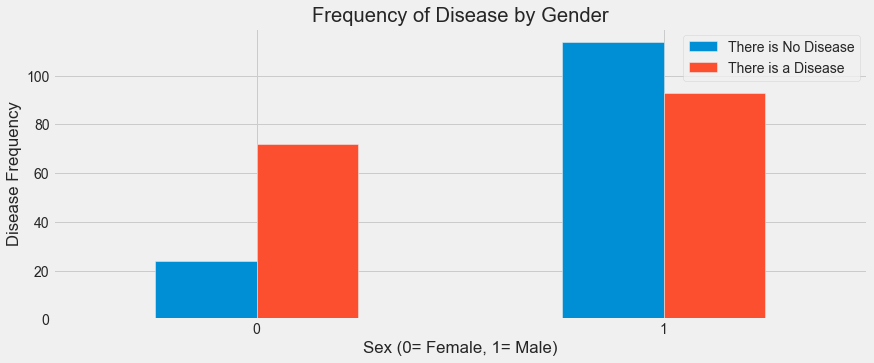

In [25]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(13,5))
plt.title('Frequency of Disease by Gender')
plt.xlabel('Sex (0= Female, 1= Male)')
plt.xticks(rotation=0)
plt.legend(["There is No Disease", "There is a Disease"])
plt.ylabel('Disease Frequency')
plt.show()

In [26]:
df.drop('target', axis=1).corrwith(df.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',)

:Bars   [index]   (0)

In [27]:
# fbs and chol are the lowest correlated with the target variable.
# All other variables have a significant correlation with the target variable.


# Data Preprocessing

In [28]:
df=pd.get_dummies(df,drop_first=True)


In [29]:
df.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  \
0   63    1       145   233    1      150      0    2.300   0       1   
1   37    1       130   250    0      187      0    3.500   0       1   
2   41    0       130   204    0      172      0    1.400   0       1   
3   56    1       120   236    0      178      0    0.800   0       1   
4   57    0       120   354    0      163      1    0.600   0       1   

   cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
0                   0                    0                  0   
1                   0                    1                  0   
2                   1                    0                  0   
3                   1                    0                  0   
4                   0                    0                  1   

   restecg_left ventricular hypertrophy  restecg_normal  slope_flat  \
0                                     0               1           0   
1                                     0               0           0   
2                                     0               1           1   
3                                     0               0           1   
4                                     0               0           1   

   slope_upsloping  thal_1  thal_2  thal_normal  
0                0       1       0            0  
1                0       0       1            0  
2                0       0       1            0  
3                0       0       1            0  
4                0       0       1            0

In [30]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=5)

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)

In [34]:
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
log_model = LogisticRegression()

In [37]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [38]:
y_pred=log_model.predict(X_test_scaled)

In [39]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [40]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
230   47    1       108   243    0      152      0    0.000   0   
170   56    1       130   256    1      142      1    0.600   1   
87    46    1       101   197    1      156      0    0.000   0   
242   64    1       145   212    0      132      0    2.000   2   
206   59    1       110   239    0      142      1    1.200   1   
248   54    1       192   283    0      195      0    0.000   1   
166   67    1       120   229    0      129      1    2.600   2   
137   62    1       128   208    1      140      0    0.000   0   
0     63    1       145   233    1      150      0    2.300   0   
30    41    0       105   198    0      168      0    0.000   1   

     cp_atypical angina  ...  restecg_left ventricular hypertrophy  \
230                   0  ...                                     0   
170                   0  ...                                     0   
87                    1  ...                                     0   
242                   0  ...                                     0   
206                   0  ...                                     0   
248                   1  ...                                     0   
166                   0  ...                                     0   
137                   1  ...                                     0   
0                     0  ...                                     0   
30                    1  ...                                     0   

     restecg_normal  slope_flat  slope_upsloping  thal_1  thal_2  thal_normal  \
230               0           1                0       0       1            0   
170               1           0                1       1       0            0   
87                0           1                0       0       0            1   
242               1           0                1       1       0            0   
206               1           0                1       0       0            1   
248               1           1                0       0       0            1   
166               1           0                1       0       0            1   
137               1           1                0       0       1            0   
0                 1           0                0       1       0            0   
30                0           1                0       0       1            0   

     target  pred  pred_proba  
230       0     1       0.958  
170       0     0       0.500  
87        1     1       0.832  
242       0     0       0.098  
206       0     0       0.047  
248       0     1       0.614  
166       0     0       0.021  
137       1     1       0.890  
0         1     1       0.631  
30        1     1       0.972  

[10 rows x 22 columns]

## Model Performance

In [41]:
from sklearn.metrics import confusion_matrix, classification_report


In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)  


Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[ 79  18]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.85      0.87      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



### Cross Validate

In [44]:
from sklearn.model_selection import cross_validate


In [45]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  test_recall  test_f1  test_accuracy
1      0.009       0.003           0.750        0.750    0.750          0.727
2      0.014       0.005           0.714        0.833    0.769          0.727
3      0.011       0.003           0.800        0.727    0.762          0.762
4      0.007       0.004           0.833        0.909    0.870          0.857
5      0.027       0.006           0.889        0.727    0.800          0.810
6      0.007       0.003           0.818        0.818    0.818          0.810
7      0.006       0.002           0.900        0.818    0.857          0.857
8      0.007       0.004           0.846        0.917    0.880          0.857
9      0.008       0.002           0.923        1.000    0.960          0.952
10     0.005       0.003           0.857        1.000    0.923          0.905

In [46]:
df_scores.mean()[2:]     #  accuracy:0.81 

test_precision   0.833
test_recall      0.850
test_f1          0.839
test_accuracy    0.826
dtype: float64

In [47]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[ 79  18]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.85      0.87      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



Even though our test scores are a little bit lower than the training scores, cross validation shows that there is no problem with the model. Also, since our target label is not so unbalanced, we can use the accuracy score as the referencing value.



### GridSearchCV

In [48]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [49]:
C = np.logspace(-1, 5, 20)
C

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [50]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [51]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [52]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [53]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  # 0.81------->0.82

Test_Set
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Train_Set
[[82 15]
 [17 98]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.87      0.85      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [54]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

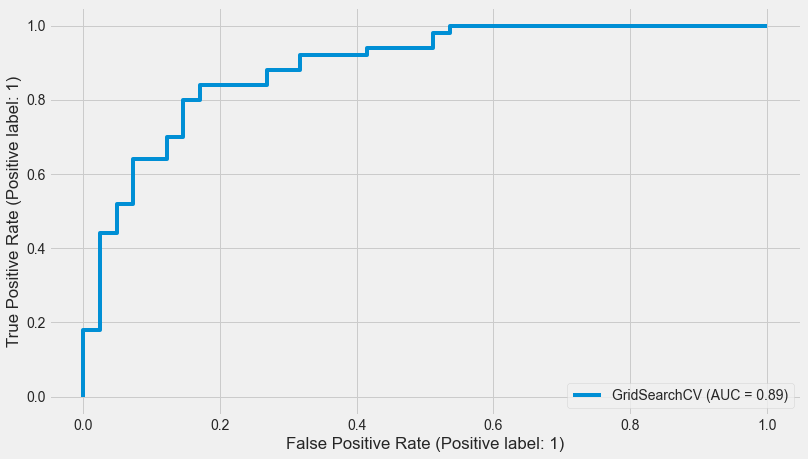

In [55]:
plot_roc_curve(grid_model, X_test_scaled, y_test) 

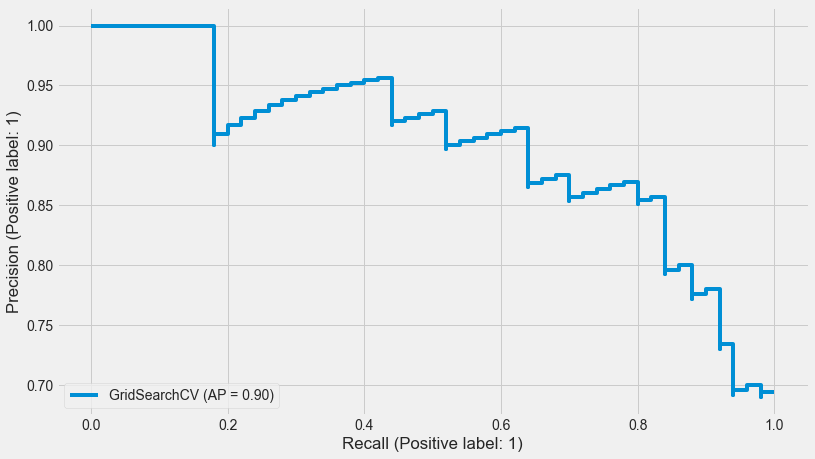

In [56]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

####  log_model final  Accuracy Score:0.82 ------------->16 hatalı tahmin

# Implement KNN and Evaluate

In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [60]:
knn_pred = knn.predict(X_test_scaled)

In [61]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[33  8]
 [11 39]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91


Train_Set
[[ 85  12]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        97
           1       0.89      0.89      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### Model Performance on Classification Tests

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [63]:
confusion_matrix(y_test, y_pred)


array([[32,  9],
       [ 8, 42]])

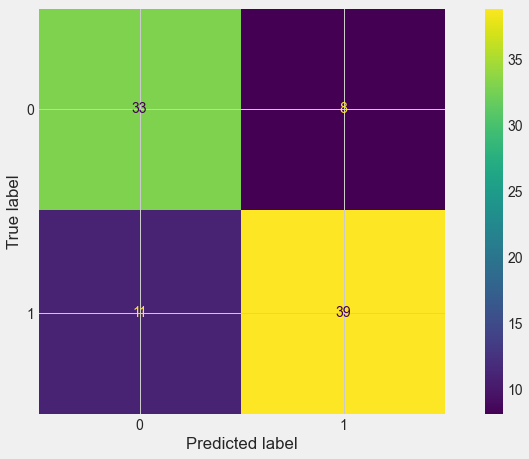

In [64]:
plot_confusion_matrix(knn, X_test_scaled, y_test);


In [65]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Elbow Method for Choosing Reasonable K Values


In [66]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [67]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test) # hatayı buluyoruz.
    test_error_rates.append(test_error)

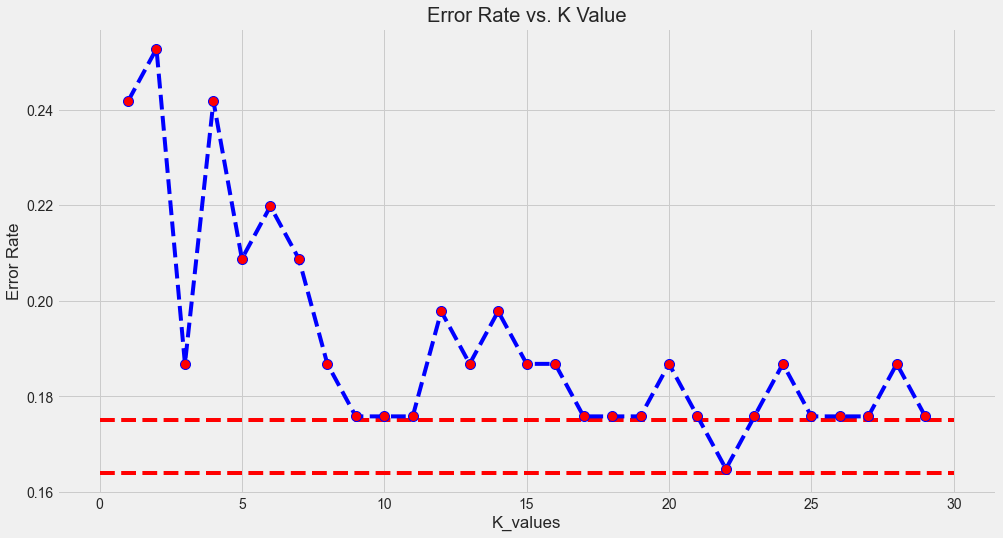

In [68]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values

In [69]:
knn = KNeighborsClassifier(n_neighbors=9)  # accuracy:0.82 -------> 16 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  # en yakın 9 komsuya bakıyoruz.

WITH K=9

Test_Set
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Train_Set
[[ 82  15]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.87      0.87      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [70]:
knn = KNeighborsClassifier(n_neighbors=22)   # accuracy:0.84 -------> 15 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) # en yakın 22 komsuya bakıyoruz.

WITH K=22

Test_Set
[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Cross Validate

In [71]:
model = KNeighborsClassifier()  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_precision  test_recall  test_f1  test_accuracy
1      0.001       0.007           0.750        0.750    0.750          0.727
2      0.001       0.014           0.769        0.833    0.800          0.773
3      0.001       0.008           0.875        0.636    0.737          0.762
4      0.001       0.005           0.909        0.909    0.909          0.905
5      0.002       0.010           0.909        0.909    0.909          0.905
6      0.001       0.003           0.900        0.818    0.857          0.857
7      0.000       0.004           0.900        0.818    0.857          0.857
8      0.001       0.003           0.846        0.917    0.880          0.857
9      0.001       0.005           0.786        0.917    0.846          0.810
10     0.001       0.003           0.846        0.917    0.880          0.857

In [72]:
df_scores.mean()[2:]        # accuracy:0.82

test_precision   0.849
test_recall      0.842
test_f1          0.843
test_accuracy    0.831
dtype: float64

In [73]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Gridsearch Method for Choosing Reasonable K Values

In [74]:
knn_grid = KNeighborsClassifier()

In [75]:
k_values= range(1,30)

In [76]:
param_grid = {"n_neighbors":k_values}

In [77]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [78]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [79]:
knn_grid_model.best_params_

{'n_neighbors': 18}

In [80]:
print('WITH K=18\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=18

Test_Set
[[31 10]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Evaluating ROC Curves and AUC

In [81]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [82]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

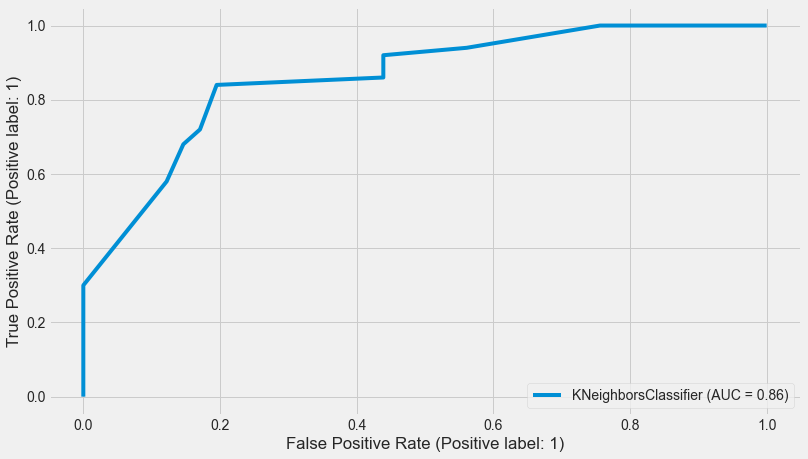

In [83]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [84]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8590243902439024

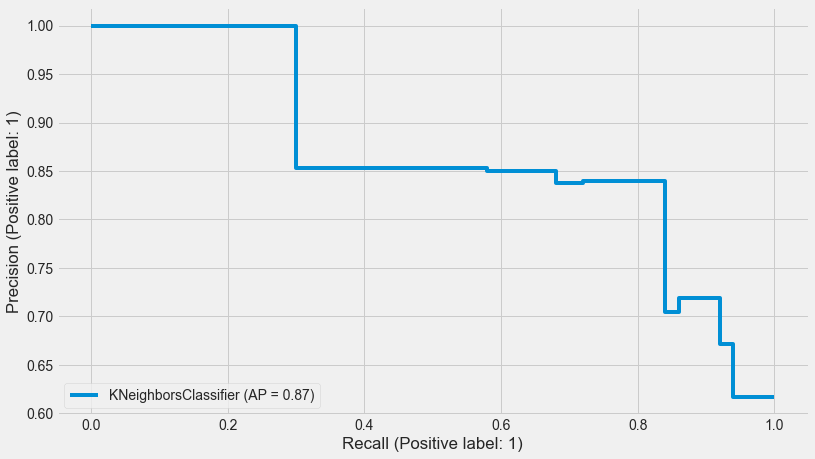

In [85]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

#### Logistic Regression with parameters found in the GridSearch and 0.5 as the optimal threshold

In [86]:
model = LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')
# CV(10, model, pd.DataFrame(X_train_scaled), y_train, 0.5)

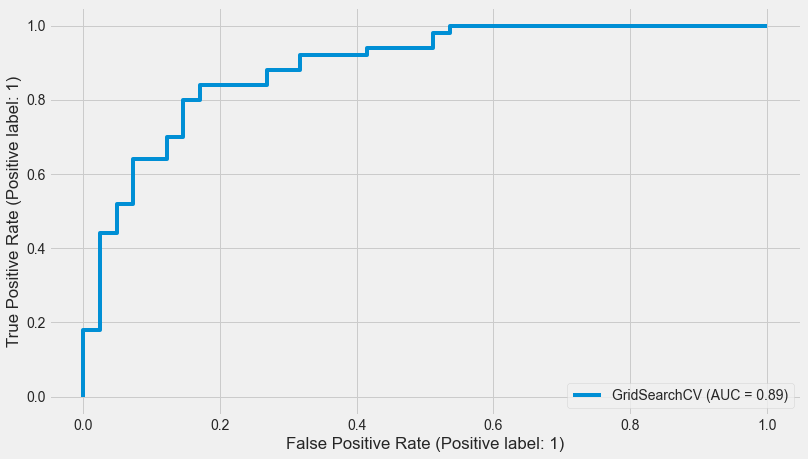

In [87]:
plot_roc_curve(grid_model, X_test_scaled, y_test);


#### KNN with k=12

In [88]:
model = KNeighborsClassifier(n_neighbors=12)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.831
test_precision   0.865
test_recall      0.814
test_f1          0.834
dtype: float64

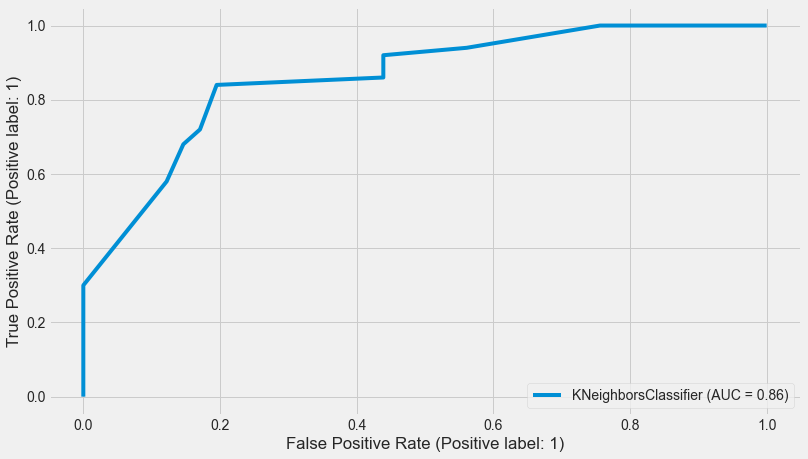

In [89]:
plot_roc_curve(knn_model, X_test_scaled, y_test);


I choose to continue with logistic regression.



# Chose best model and make a random prediction 

In [90]:
df.describe().T

count    mean    std     min     25%  \
age                                  303.000  54.366  9.082  29.000  47.500   
sex                                  303.000   0.683  0.466   0.000   0.000   
trestbps                             303.000 131.624 17.538  94.000 120.000   
chol                                 303.000 246.264 51.831 126.000 211.000   
fbs                                  303.000   0.149  0.356   0.000   0.000   
thalach                              303.000 149.647 22.905  71.000 133.500   
exang                                303.000   0.327  0.470   0.000   0.000   
oldpeak                              303.000   1.040  1.161   0.000   0.000   
ca                                   303.000   0.729  1.023   0.000   0.000   
target                               303.000   0.545  0.499   0.000   0.000   
cp_atypical angina                   303.000   0.165  0.372   0.000   0.000   
cp_non-anginal pain                  303.000   0.287  0.453   0.000   0.000   
cp_typical angina                    303.000   0.472  0.500   0.000   0.000   
restecg_left ventricular hypertrophy 303.000   0.013  0.114   0.000   0.000   
restecg_normal                       303.000   0.485  0.501   0.000   0.000   
slope_flat                           303.000   0.469  0.500   0.000   0.000   
slope_upsloping                      303.000   0.462  0.499   0.000   0.000   
thal_1                               303.000   0.059  0.237   0.000   0.000   
thal_2                               303.000   0.548  0.499   0.000   0.000   
thal_normal                          303.000   0.386  0.488   0.000   0.000   

                                         50%     75%     max  
age                                   55.000  61.000  77.000  
sex                                    1.000   1.000   1.000  
trestbps                             130.000 140.000 200.000  
chol                                 240.000 274.500 564.000  
fbs                                    0.000   0.000   1.000  
thalach                              153.000 166.000 202.000  
exang                                  0.000   1.000   1.000  
oldpeak                                0.800   1.600   6.200  
ca                                     0.000   1.000   4.000  
target                                 1.000   1.000   1.000  
cp_atypical angina                     0.000   0.000   1.000  
cp_non-anginal pain                    0.000   1.000   1.000  
cp_typical angina                      0.000   1.000   1.000  
restecg_left ventricular hypertrophy   0.000   0.000   1.000  
restecg_normal                         0.000   1.000   1.000  
slope_flat                             0.000   1.000   1.000  
slope_upsloping                        0.000   1.000   1.000  
thal_1                                 0.000   0.000   1.000  
thal_2                                 1.000   1.000   1.000  
thal_normal                            0.000   1.000   1.000

In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(X)

MinMaxScaler()

In [93]:
X_scaled = scaler.transform(X)

### For Logistic Regression

In [94]:
final_log_model =  LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')

In [95]:
a = X.sample(5)

In [96]:
new_obs = a.to_dict()
new_obs

{'age': {155: 58, 182: 61, 255: 45, 42: 45, 197: 67},
 'sex': {155: 0, 182: 0, 255: 1, 42: 1, 197: 1},
 'trestbps': {155: 130, 182: 130, 255: 142, 42: 104, 197: 125},
 'chol': {155: 197, 182: 330, 255: 309, 42: 208, 197: 254},
 'fbs': {155: 0, 182: 0, 255: 0, 42: 0, 197: 1},
 'thalach': {155: 131, 182: 169, 255: 147, 42: 148, 197: 163},
 'exang': {155: 0, 182: 0, 255: 1, 42: 1, 197: 0},
 'oldpeak': {155: 0.6, 182: 0.0, 255: 0.0, 42: 3.0, 197: 0.2},
 'ca': {155: 0, 182: 0, 255: 3, 42: 0, 197: 2},
 'cp_atypical angina': {155: 0, 182: 0, 255: 0, 42: 0, 197: 0},
 'cp_non-anginal pain': {155: 0, 182: 0, 255: 0, 42: 0, 197: 0},
 'cp_typical angina': {155: 1, 182: 1, 255: 1, 42: 1, 197: 1},
 'restecg_left ventricular hypertrophy': {155: 0,
  182: 0,
  255: 0,
  42: 0,
  197: 0},
 'restecg_normal': {155: 0, 182: 1, 255: 1, 42: 1, 197: 0},
 'slope_flat': {155: 0, 182: 1, 255: 0, 42: 0, 197: 0},
 'slope_upsloping': {155: 1, 182: 0, 255: 1, 42: 1, 197: 1},
 'thal_1': {155: 0, 182: 0, 255: 0, 42: 

In [97]:
samples = pd.DataFrame(new_obs)
samples

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
155   58    0       130   197    0      131      0    0.600   0   
182   61    0       130   330    0      169      0    0.000   0   
255   45    1       142   309    0      147      1    0.000   3   
42    45    1       104   208    0      148      1    3.000   0   
197   67    1       125   254    1      163      0    0.200   2   

     cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
155                   0                    0                  1   
182                   0                    0                  1   
255                   0                    0                  1   
42                    0                    0                  1   
197                   0                    0                  1   

     restecg_left ventricular hypertrophy  restecg_normal  slope_flat  \
155                                     0               0           0   
182                                     0               1           1   
255                                     0               1           0   
42                                      0               1           0   
197                                     0               0           0   

     slope_upsloping  thal_1  thal_2  thal_normal  
155                1       0       1            0  
182                0       0       1            0  
255                1       0       0            1  
42                 1       0       1            0  
197                1       0       0            1

In [98]:
samples_scaled = scaler.transform(samples)
samples_scaled

array([[0.60416667, 0.        , 0.33962264, 0.16210046, 0.        ,
        0.45801527, 0.        , 0.09677419, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        ],
       [0.66666667, 0.        , 0.33962264, 0.46575342, 0.        ,
        0.7480916 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.33333333, 1.        , 0.45283019, 0.41780822, 0.        ,
        0.58015267, 1.        , 0.        , 0.75      , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.33333333, 1.        , 0.09433962, 0.18721461, 0.        ,
        0.58778626, 1.        , 0.48387097, 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.   

In [99]:
final_log_model.fit(X_scaled,y)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [100]:
predictions = final_log_model.predict(samples_scaled)
predictions_proba = final_log_model.predict_proba(samples_scaled)


In [101]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

# predictions are according to 0.5 threshold

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
155   58    0       130   197    0      131      0    0.600   0   
182   61    0       130   330    0      169      0    0.000   0   
255   45    1       142   309    0      147      1    0.000   3   
42    45    1       104   208    0      148      1    3.000   0   
197   67    1       125   254    1      163      0    0.200   2   

     cp_atypical angina  ...  restecg_left ventricular hypertrophy  \
155                   0  ...                                     0   
182                   0  ...                                     0   
255                   0  ...                                     0   
42                    0  ...                                     0   
197                   0  ...                                     0   

     restecg_normal  slope_flat  slope_upsloping  thal_1  thal_2  thal_normal  \
155               0           0                1       0       1            0   
182               1           1                0       0       1            0   
255               1           0                1       0       0            1   
42                1           0                1       0       1            0   
197               0           0                1       0       0            1   

     pred  pred_proba_1  pred_proba_0  
155     1         0.521         0.479  
182     1         0.645         0.355  
255     0         0.181         0.819  
42      0         0.418         0.582  
197     0         0.239         0.761  

[5 rows x 22 columns]

### For KNN

In [102]:
final_knn_model = KNeighborsClassifier(n_neighbors=12)

In [103]:
final_knn_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=12)

In [104]:
predictions = final_knn_model.predict(samples_scaled)
predictions_proba = final_knn_model.predict_proba(samples_scaled)


In [105]:
samples["pred_KNN"] = predictions
samples["pred_proba_1_KNN"] = predictions_proba[:,1]
samples["pred_proba_0_KNN"] = predictions_proba[:,0]
samples


age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
155   58    0       130   197    0      131      0    0.600   0   
182   61    0       130   330    0      169      0    0.000   0   
255   45    1       142   309    0      147      1    0.000   3   
42    45    1       104   208    0      148      1    3.000   0   
197   67    1       125   254    1      163      0    0.200   2   

     cp_atypical angina  ...  slope_upsloping  thal_1  thal_2  thal_normal  \
155                   0  ...                1       0       1            0   
182                   0  ...                0       0       1            0   
255                   0  ...                1       0       0            1   
42                    0  ...                1       0       1            0   
197                   0  ...                1       0       0            1   

     pred  pred_proba_1  pred_proba_0  pred_KNN  pred_proba_1_KNN  \
155     1         0.521         0.479         1             0.667   
182     1         0.645         0.355         1             0.750   
255     0         0.181         0.819         0             0.000   
42      0         0.418         0.582         0             0.333   
197     0         0.239         0.761         0             0.250   

     pred_proba_0_KNN  
155             0.333  
182             0.250  
255             1.000  
42              0.667  
197             0.750  

[5 rows x 25 columns]